# Final Project - STAT 5600

## Prediction and Analysis of Animal Shelter Intakes and Outcomes

## Srimedha Bhavani Chandoo

### Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset
data = pd.read_csv("aac_intakes_outcomes.csv")

In [4]:
data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79672 non-null  object 
 1   animal_id_outcome           79672 non-null  object 
 2   date_of_birth               79672 non-null  object 
 3   outcome_subtype             36348 non-null  object 
 4   outcome_type                79662 non-null  object 
 5   sex_upon_outcome            79671 non-null  object 
 6   age_upon_outcome_(days)     79672 non-null  int64  
 7   age_upon_outcome_(years)    79672 non-null  float64
 8   age_upon_outcome_age_group  79672 non-null  object 
 9   outcome_datetime            79672 non-null  object 
 10  outcome_month               79672 non-null  int64  
 11  outcome_year                79672 non-null  int64  
 12  outcome_monthyear           79672 non-null  object 
 13  outcome_weekday             796

In [6]:
data.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [7]:
data.shape

(79672, 41)

In [8]:
data.isnull().sum()

age_upon_outcome                  0
animal_id_outcome                 0
date_of_birth                     0
outcome_subtype               43324
outcome_type                     10
sex_upon_outcome                  1
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
outcome_datetime                  0
outcome_month                     0
outcome_year                      0
outcome_monthyear                 0
outcome_weekday                   0
outcome_hour                      0
outcome_number                    0
dob_year                          0
dob_month                         0
dob_monthyear                     0
age_upon_intake                   0
animal_id_intake                  0
animal_type                       0
breed                             0
color                             0
found_location                    0
intake_condition                  0
intake_type                       0
sex_upon_intake             

In [9]:
data.dtypes

age_upon_outcome               object
animal_id_outcome              object
date_of_birth                  object
outcome_subtype                object
outcome_type                   object
sex_upon_outcome               object
age_upon_outcome_(days)         int64
age_upon_outcome_(years)      float64
age_upon_outcome_age_group     object
outcome_datetime               object
outcome_month                   int64
outcome_year                    int64
outcome_monthyear              object
outcome_weekday                object
outcome_hour                    int64
outcome_number                float64
dob_year                        int64
dob_month                       int64
dob_monthyear                  object
age_upon_intake                object
animal_id_intake               object
animal_type                    object
breed                          object
color                          object
found_location                 object
intake_condition               object
intake_type 

### Exploratory Data Analysis

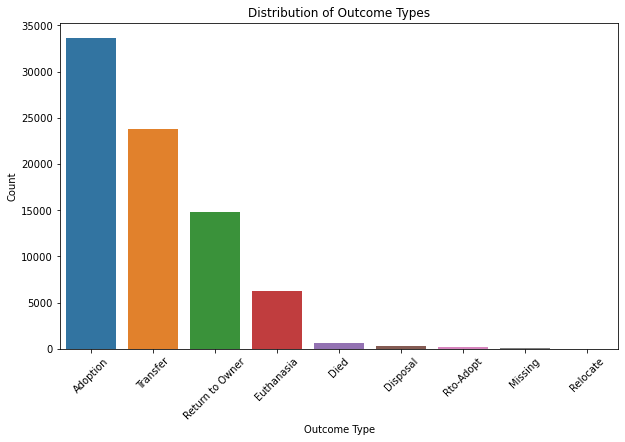

In [10]:
# Outcome type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='outcome_type', order=data['outcome_type'].value_counts().index)
plt.title("Distribution of Outcome Types")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

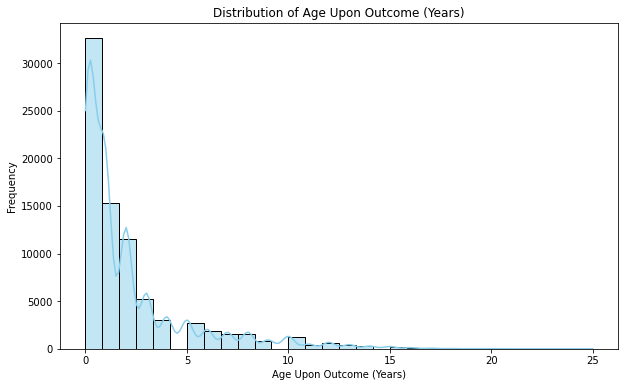

In [11]:
# Distribution of age upon outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age_upon_outcome_(years)', bins=30, kde=True, color='skyblue')
plt.title("Distribution of Age Upon Outcome (Years)")
plt.xlabel("Age Upon Outcome (Years)")
plt.ylabel("Frequency")
plt.show()

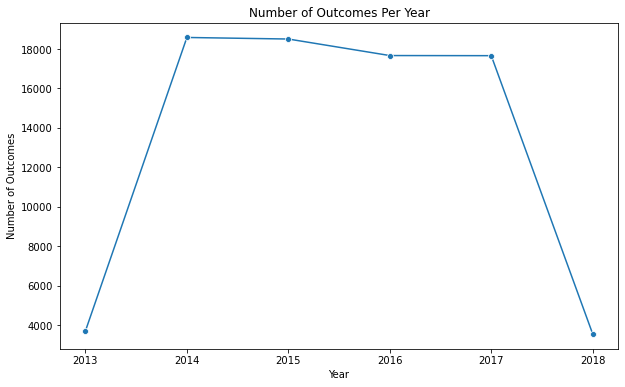

In [12]:
# Number of outcomes per year
outcomes_per_year = data['outcome_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=outcomes_per_year.index, y=outcomes_per_year.values, marker='o')
plt.title("Number of Outcomes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Outcomes")
plt.show()

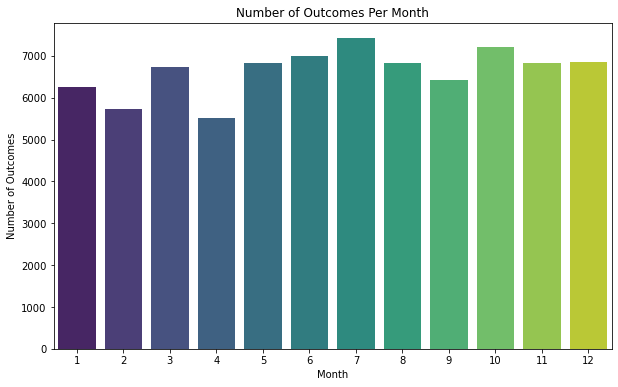

In [13]:
# Number of outcomes per month
outcomes_per_month = data['outcome_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=outcomes_per_month.index, y=outcomes_per_month.values, palette='viridis')
plt.title("Number of Outcomes Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Outcomes")
plt.show()

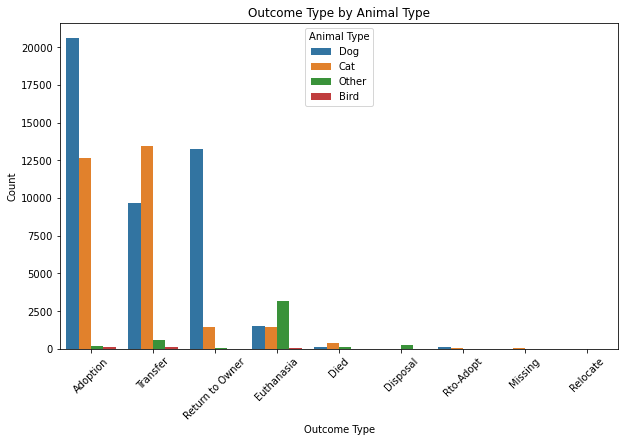

In [14]:
# Comparing outcome type with animal type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='outcome_type', hue='animal_type', order=data['outcome_type'].value_counts().index)
plt.title("Outcome Type by Animal Type")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Animal Type')
plt.show()

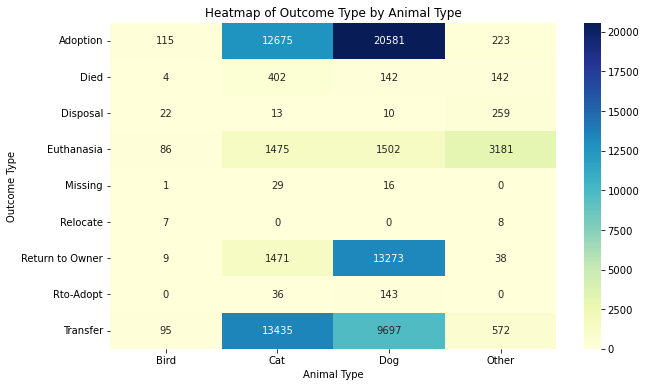

In [15]:
import seaborn as sns
import pandas as pd

# Prepare data for the heatmap
heatmap_data = data.groupby(['outcome_type', 'animal_type']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Outcome Type by Animal Type")
plt.xlabel("Animal Type")
plt.ylabel("Outcome Type")
plt.show()

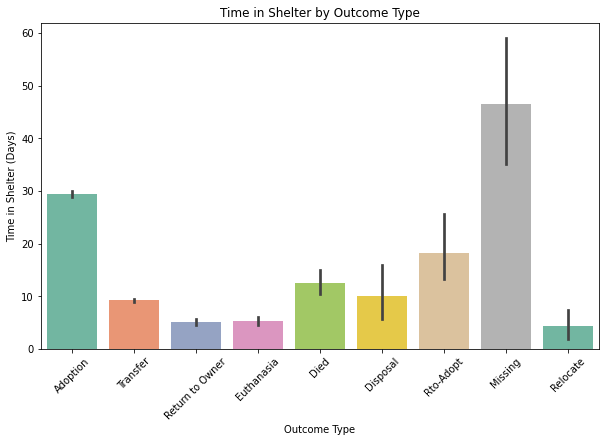

In [16]:
# Time in shelter distribution by outcome type
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='outcome_type', y='time_in_shelter_days', order=data['outcome_type'].value_counts().index, palette='Set2')
plt.title("Time in Shelter by Outcome Type")
plt.xlabel("Outcome Type")
plt.ylabel("Time in Shelter (Days)")
plt.xticks(rotation=45)
plt.show()

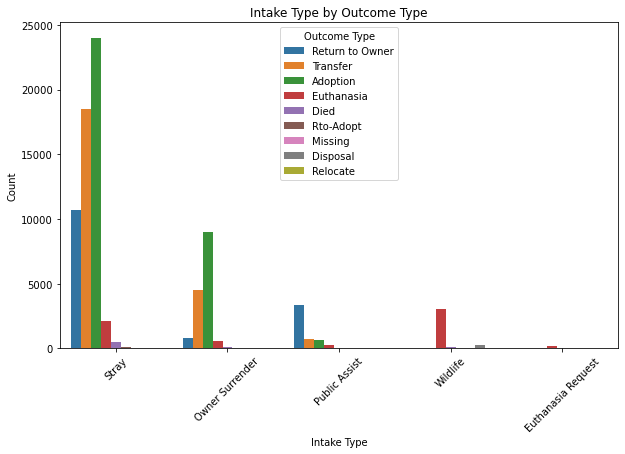

In [17]:
# Intake type vs. outcome type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='intake_type', hue='outcome_type', order=data['intake_type'].value_counts().index)
plt.title("Intake Type by Outcome Type")
plt.xlabel("Intake Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Outcome Type')
plt.show()

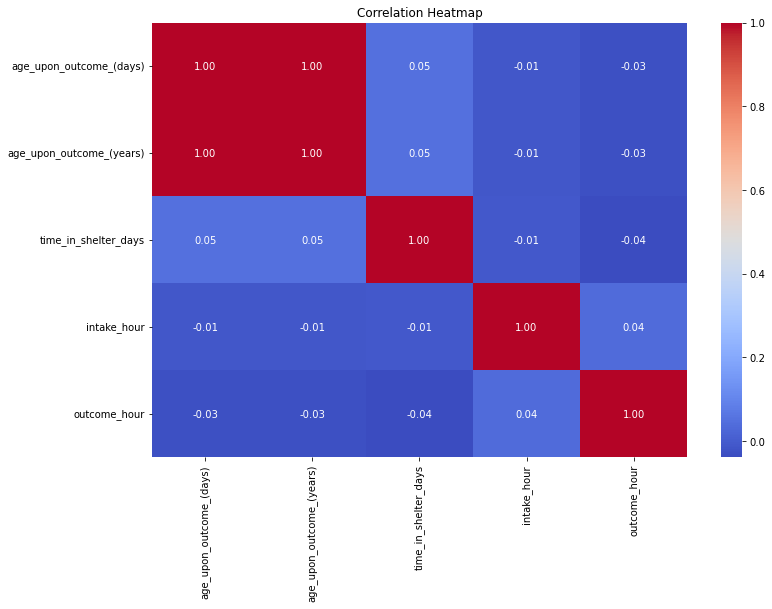

In [18]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
numerical_columns = ['age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'time_in_shelter_days', 'intake_hour', 'outcome_hour']
correlation_matrix = data[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### Feature Selection

In [19]:
df = data.copy()

# Defining the target variable and features
target = 'outcome_type'
features = [col for col in df.columns if col != target]

# Handling categorical columns using Label Encoding
label_encoders = {}
for col in features:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Ensuring the target is also label encoded
target_le = LabelEncoder()
df[target] = target_le.fit_transform(df[target])

# Feature Selection: Mutual Information
mutual_info = mutual_info_classif(df[features], df[target], random_state=42)
mutual_info_df = pd.DataFrame({
    'Feature': features,
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

# Displaying the top 15 features based on Mutual Information
print("Top 15 Features (Mutual Information):")
print(mutual_info_df.head(15))

# Feature Selection: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(df[features], df[target])

rf_feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Displaying the top 15 features based on Random Forest
print("\nTop 15 Features (Random Forest):")
print(rf_feature_importances.head(15))

# Combining the results for final selection
combined = mutual_info_df.merge(rf_feature_importances, on='Feature', suffixes=('_mutual_info', '_rf'))
combined['Average_Importance'] = combined[['Importance_mutual_info', 'Importance_rf']].mean(axis=1)
combined = combined.sort_values(by='Average_Importance', ascending=False)

top_15_features = combined.head(15)['Feature'].tolist()

print("\nFinal Top 15 Features (Combined):")
print(top_15_features)

Top 15 Features (Mutual Information):
                     Feature  Importance
3            outcome_subtype    0.913698
38           time_in_shelter    0.341482
39      time_in_shelter_days    0.341182
8           outcome_datetime    0.336637
4           sex_upon_outcome    0.259072
21                     breed    0.217375
1          animal_id_outcome    0.211411
19          animal_id_intake    0.211072
31           intake_datetime    0.205156
23            found_location    0.184399
6   age_upon_outcome_(years)    0.178248
25               intake_type    0.177528
0           age_upon_outcome    0.176802
5    age_upon_outcome_(days)    0.176677
20               animal_type    0.166771

Top 15 Features (Random Forest):
                     Feature  Importance
3            outcome_subtype    0.340748
39      time_in_shelter_days    0.105984
38           time_in_shelter    0.071130
25               intake_type    0.069888
4           sex_upon_outcome    0.062044
20               animal_ty

In [20]:
top_15_features = [
    'outcome_subtype', 'time_in_shelter_days', 'time_in_shelter',
    'outcome_datetime', 'sex_upon_outcome', 'intake_type', 'breed',
    'animal_id_intake', 'animal_id_outcome', 'intake_datetime',
    'age_upon_outcome_(years)', 'age_upon_outcome_(days)', 'found_location',
    'animal_type', 'age_upon_outcome']

data1 = data[top_15_features + ['outcome_type']]

data1.head()

,outcome_subtype,time_in_shelter_days,time_in_shelter,outcome_datetime,sex_upon_outcome,intake_type,breed,animal_id_intake,animal_id_outcome,intake_datetime,age_upon_outcome_(years),age_upon_outcome_(days),found_location,animal_type,age_upon_outcome,outcome_type
0,NaN,0.588194,0 days 14:07:00.000000000,2017-12-07 14:07:00,Neutered Male,Stray,Spinone Italiano Mix,A006100,A006100,2017-12-07 00:00:00,10.0,3650,Colony Creek And Hunters Trace in Austin (TX),Dog,10 years,Return to Owner
1,NaN,1.259722,1 days 06:14:00.000000000,2014-12-20 16:35:00,Neutered Male,Public Assist,Spinone Italiano Mix,A006100,A006100,2014-12-19 10:21:00,7.0,2555,8700 Research Blvd in Austin (TX),Dog,7 years,Return to Owner
2,NaN,1.113889,1 days 02:44:00.000000000,2014-03-08 17:10:00,Neutered Male,Public Assist,Spinone Italiano Mix,A006100,A006100,2014-03-07 14:26:00,6.0,2190,8700 Research in Austin (TX),Dog,6 years,Return to Owner
3,Partner,4.970139,4 days 23:17:00.000000000,2014-04-07 15:12:00,Neutered Male,Owner Surrender,Dachshund,A047759,A047759,2014-04-02 15:55:00,10.0,3650,Austin (TX),Dog,10 years,Transfer
4,NaN,0.119444,0 days 02:52:00.000000000,2013-11-16 11:54:00,Neutered Male,Public Assist,Shetland Sheepdog,A134067,A134067,2013-11-16 09:02:00,16.0,5840,12034 Research Blvd in Austin (TX),Dog,16 years,Return to Owner


## Data Modeling

### Data Preprocessing

In [21]:
# Updated lists of numerical and categorical columns based on selected features
numerical_columns = ['age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'time_in_shelter_days']
categorical_columns = [
    'outcome_subtype', 'time_in_shelter', 'outcome_datetime', 'sex_upon_outcome',
    'intake_type', 'breed', 'animal_id_intake', 'animal_id_outcome', 
    'intake_datetime', 'found_location', 'animal_type', 'age_upon_outcome', 'outcome_type'
]

# Creating an imputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Creating an imputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

# Applying the imputers
data1[numerical_columns] = num_imputer.fit_transform(data1[numerical_columns])
data1[categorical_columns] = cat_imputer.fit_transform(data1[categorical_columns])

# Checking if any missing values remain
print("\nMissing Values After Imputation:")
print(data1.isnull().sum())


Missing Values After Imputation:
outcome_subtype             0
time_in_shelter_days        0
time_in_shelter             0
outcome_datetime            0
sex_upon_outcome            0
intake_type                 0
breed                       0
animal_id_intake            0
animal_id_outcome           0
intake_datetime             0
age_upon_outcome_(years)    0
age_upon_outcome_(days)     0
found_location              0
animal_type                 0
age_upon_outcome            0
outcome_type                0
dtype: int64


### Encoding the categorical columns with LabelEncoder

In [22]:
# Updated list of categorical columns based on selected features
categorical_columns = [
    'outcome_subtype', 'sex_upon_outcome', 'intake_type', 'breed', 
    'animal_id_intake', 'animal_id_outcome', 'found_location', 
    'animal_type', 'age_upon_outcome', 'outcome_type'
]

# Dictionary to store label encoders for each column
label_encoders = {}

# Apply Label Encoding to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    data1[col] = le.fit_transform(data1[col].astype(str))
    label_encoders[col] = le

# Display the first few rows of the transformed data
data1.head()

,outcome_subtype,time_in_shelter_days,time_in_shelter,outcome_datetime,sex_upon_outcome,intake_type,breed,animal_id_intake,animal_id_outcome,intake_datetime,age_upon_outcome_(years),age_upon_outcome_(days),found_location,animal_type,age_upon_outcome,outcome_type
0,12,0.588194,0 days 14:07:00.000000000,2017-12-07 14:07:00,2,3,1982,0,0,2017-12-07 00:00:00,10.0,3650.0,27355,2,7,6
1,12,1.259722,1 days 06:14:00.000000000,2014-12-20 16:35:00,2,2,1982,0,0,2014-12-19 10:21:00,7.0,2555.0,23503,2,41,6
2,12,1.113889,1 days 02:44:00.000000000,2014-03-08 17:10:00,2,2,1982,0,0,2014-03-07 14:26:00,6.0,2190.0,23504,2,39,6
3,12,4.970139,4 days 23:17:00.000000000,2014-04-07 15:12:00,2,1,830,1,1,2014-04-02 15:55:00,10.0,3650.0,25825,2,7,8
4,12,0.119444,0 days 02:52:00.000000000,2013-11-16 11:54:00,2,2,1880,2,2,2013-11-16 09:02:00,16.0,5840.0,3301,2,14,6


### Identifying the numerical features to scale

In [23]:
from sklearn.preprocessing import StandardScaler

# Updated list of numerical columns based on selected features
numerical_columns = ['age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'time_in_shelter_days']

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler to the numerical columns
data1[numerical_columns] = scaler.fit_transform(data1[numerical_columns])

# Display the first few rows of the transformed data
data1.head()

,outcome_subtype,time_in_shelter_days,time_in_shelter,outcome_datetime,sex_upon_outcome,intake_type,breed,animal_id_intake,animal_id_outcome,intake_datetime,age_upon_outcome_(years),age_upon_outcome_(days),found_location,animal_type,age_upon_outcome,outcome_type
0,12,-0.387938,0 days 14:07:00.000000000,2017-12-07 14:07:00,2,3,1982,0,0,2017-12-07 00:00:00,2.709395,2.709395,27355,2,7,6
1,12,-0.371827,1 days 06:14:00.000000000,2014-12-20 16:35:00,2,2,1982,0,0,2014-12-19 10:21:00,1.674934,1.674934,23503,2,41,6
2,12,-0.375325,1 days 02:44:00.000000000,2014-03-08 17:10:00,2,2,1982,0,0,2014-03-07 14:26:00,1.330113,1.330113,23504,2,39,6
3,12,-0.282803,4 days 23:17:00.000000000,2014-04-07 15:12:00,2,1,830,1,1,2014-04-02 15:55:00,2.709395,2.709395,25825,2,7,8
4,12,-0.399185,0 days 02:52:00.000000000,2013-11-16 11:54:00,2,2,1880,2,2,2013-11-16 09:02:00,4.778318,4.778318,3301,2,14,6


### Performing the train-test split

In [24]:
X = data1.drop(columns=["outcome_type"])
y = data1["outcome_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (63737, 15)
X_test shape: (15935, 15)
y_train shape: (63737,)
y_test shape: (15935,)


In [25]:
# Checking the data types of columns in X_test
# print(X_test.dtypes)

# Finding the columns that are object types
object_columns_test = X_test.select_dtypes(include=['object']).columns
print("Object columns in X_test:", object_columns_test)

Object columns in X_test: Index(['time_in_shelter', 'outcome_datetime', 'intake_datetime'], dtype='object')


### Converting all non-numeric columns in combined data to string to handle unseen labels

In [26]:
# Creating a dictionary to store LabelEncoders for each column
label_encoders = {}

# Combining the training and test data to fit the encoder on all data
combined_data = pd.concat([X_train, X_test], axis=0)

for col in object_columns_test:
    le = LabelEncoder()
    le.fit(combined_data[col].astype(str))  # Fitting on all data to cover all possible labels
    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le  # Saving the encoder for future use if needed

In [27]:
X_test.dtypes

outcome_subtype               int32
time_in_shelter_days        float64
time_in_shelter               int32
outcome_datetime              int32
sex_upon_outcome              int32
intake_type                   int32
breed                         int32
animal_id_intake              int32
animal_id_outcome             int32
intake_datetime               int32
age_upon_outcome_(years)    float64
age_upon_outcome_(days)     float64
found_location                int32
animal_type                   int32
age_upon_outcome              int32
dtype: object

In [28]:
X_test.head()

,outcome_subtype,time_in_shelter_days,time_in_shelter,outcome_datetime,sex_upon_outcome,intake_type,breed,animal_id_intake,animal_id_outcome,intake_datetime,age_upon_outcome_(years),age_upon_outcome_(days),found_location,animal_type,age_upon_outcome
8777,12,-0.367911,1985,3652,3,1,670,7561,7561,3436,-0.049169,-0.049169,35323,2,21
54058,12,0.030304,8457,42670,2,3,952,48370,48370,36554,-0.625444,-0.625444,24611,1,30
6648,12,0.586321,18749,3155,0,3,952,5668,5668,1801,-0.682127,-0.682127,21289,1,19
22512,6,0.372768,15574,16146,3,1,1399,20001,20001,13075,0.640472,0.640472,25825,1,32
32255,12,-0.353998,9358,23380,3,3,1267,28611,28611,20505,0.640472,0.640472,29824,2,32


In [29]:
# Converting the columns to numeric if they are not already
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Checking for missing values and handling them
X_train.fillna(0, inplace=True)  # Replacing NaNs with 0
y_train.fillna(0, inplace=True)

# Checking the data types to ensure they are all numeric
# print(X_train.dtypes)
# print(y_train.dtypes)

### Maximum Likelihood Estimation

In [30]:
# Fitting a simple OLS regression model (MLE)
X_train_mle = sm.add_constant(X_train)
mle_model = sm.OLS(y_train, X_train_mle).fit()
mle_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           outcome_type   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     1598.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:23:34   Log-Likelihood:            -1.6169e+05
No. Observations:               63737   AIC:                         3.234e+05
Df Residuals:                   63723   BIC:                         3.235e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.0441      0.104     38.845      0.000       3.840       4.248
outcome_subtype              0.2635      0.006     46.219      0.000       0.252       0.275
time_in_shelter_days         0.6454      0.125      5.156      0.000       0.400       0.891
time_in_shelter          -8.718e-05   1.34e-06    -65.063      0.000   -8.98e-05   -8.46e-05
outcome_datetime            -0.0006   7.36e-05     -8.439      0.000      -0.001      -0.000
sex_upon_outcome            -0.8288      0.011    -73.633      0.000      -0.851      -0.807
intake_type                  0.1992      0.015     12.942      0.000       0.169       0.229
breed                        0.0002   2.53e-05      7.661      0.000       0.000       0.000
animal_id_intake         -9.039e-06   7.17e-07    -12.600      0.000   -1.04e-05   -7.63e-06
animal_id_outcome        -9.039e-06   7.17e-07    -12.600      0.000   -1.04e-05   -7.63e-06
intake_datetime              0.0007   8.53e-05      8.575      0.000       0.001       0.001
age_upon_outcome_(years)     0.1353      0.007     20.181      0.000       0.122       0.148
age_upon_outcome_(days)      0.1353      0.007     20.181      0.000       0.122       0.148
found_location           -7.827e-06   1.27e-06     -6.160      0.000   -1.03e-05   -5.34e-06
animal_type                 -0.4188      0.022    -19.019      0.000      -0.462      -0.376
age_upon_outcome             0.0017      0.001      1.708      0.088      -0.000       0.004
==============================================================================
Omnibus:                    15156.682   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3144.275
Skew:                           0.214   Prob(JB):                         0.00
Kurtosis:                       2.000   Cond. No.                     2.59e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.91e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Ordinary Least Squares

In [31]:
# Fitting an OLS Regression using sklearn
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
print("OLS Model Coefficients:", ols_model.coef_)

OLS Model Coefficients: [ 2.63511721e-01  6.45379126e-01 -8.71762864e-05 -6.20955670e-04
 -8.28795370e-01  1.99205376e-01  1.94172215e-04 -9.03894436e-06
 -9.03894456e-06  7.31041860e-04  1.35332489e-01  1.35332489e-01
 -7.82697672e-06 -4.18830067e-01  1.70095215e-03]


### Logistic Regression

In [32]:
# Fitting the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
# print("Logistic Regression Coefficients:", logreg_model.coef_)

# Printing the accuracy
accuracy = logreg_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.537307812990273


In [33]:
X_train.head()

,outcome_subtype,time_in_shelter_days,time_in_shelter,outcome_datetime,sex_upon_outcome,intake_type,breed,animal_id_intake,animal_id_outcome,intake_datetime,age_upon_outcome_(years),age_upon_outcome_(days),found_location,animal_type,age_upon_outcome
1791,12,-0.311145,14559,34891,3,3,669,1510,1510,30115,0.640472,0.640472,13628,2,32
20091,12,0.724230,19843,14903,2,3,952,17812,17812,11420,-0.682127,-0.682127,16371,1,19
19501,6,7.851004,16156,26475,3,3,1788,17279,17279,11020,0.640472,0.640472,33489,2,32
11393,12,-0.303247,17485,6057,3,3,2133,9874,9874,5545,-0.455396,-0.455396,29289,2,6
8639,12,-0.284969,18285,3659,3,3,952,7450,7450,3344,-0.540420,-0.540420,13588,1,40


In [34]:
X_test.head()

,outcome_subtype,time_in_shelter_days,time_in_shelter,outcome_datetime,sex_upon_outcome,intake_type,breed,animal_id_intake,animal_id_outcome,intake_datetime,age_upon_outcome_(years),age_upon_outcome_(days),found_location,animal_type,age_upon_outcome
8777,12,-0.367911,1985,3652,3,1,670,7561,7561,3436,-0.049169,-0.049169,35323,2,21
54058,12,0.030304,8457,42670,2,3,952,48370,48370,36554,-0.625444,-0.625444,24611,1,30
6648,12,0.586321,18749,3155,0,3,952,5668,5668,1801,-0.682127,-0.682127,21289,1,19
22512,6,0.372768,15574,16146,3,1,1399,20001,20001,13075,0.640472,0.640472,25825,1,32
32255,12,-0.353998,9358,23380,3,3,1267,28611,28611,20505,0.640472,0.640472,29824,2,32


In [35]:
X_train.isnull().sum().sum()
X_test.isnull().sum().sum()

0

### K-Nearest Neighbors

In [36]:
pca = PCA(n_components=0.95)  # Retaining 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
print("KNN Model Accuracy:", knn_model.score(X_test_pca, y_test))

KNN Model Accuracy: 0.5593347976153122


### AdaBoost Model

In [37]:
# Fitting the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
print("AdaBoost Model Accuracy:", adaboost_model.score(X_test, y_test))

AdaBoost Model Accuracy: 0.5292124254785064


### Gradient Boosting Model

In [38]:
# Fitting the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
print("Gradient Boosting Model Accuracy:", gb_model.score(X_test, y_test))

Gradient Boosting Model Accuracy: 0.827361154690932


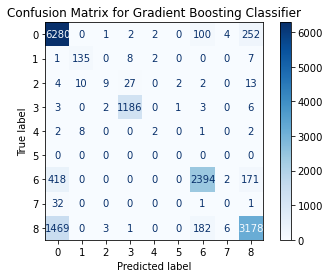

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Making the predictions on the test set
y_pred = gb_model.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

### XGBoost Model

In [40]:
# Fitting the XGBoost model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Model Accuracy:", xgb_model.score(X_test, y_test))

XGBoost Model Accuracy: 0.8431126451208033


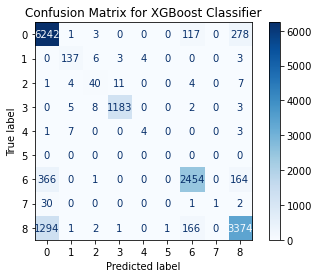

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Generate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

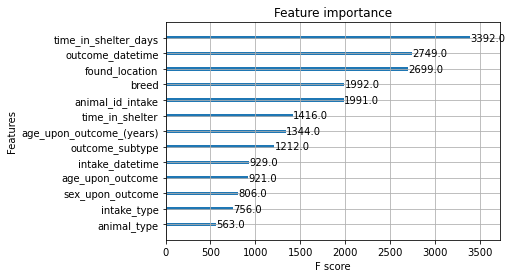

In [42]:
from xgboost import plot_importance

plot_importance(xgb_model)

### Generating a classification report for each model

In [43]:
models = {
    "Logistic Regression": logreg_model,
#     "KNN": knn_model,
    "AdaBoost": adaboost_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression Evaluation:
[[5580    0    0    0    0  189    0  872]
 [  65    0    0    0    0    6    0   82]
 [  17    0    0    0    0    2    0   48]
 [ 188    0    0    0    0  169    0  844]
 [  11    0    0    0    0    0    0    4]
 [ 868    0    0    0    0  692    0 1425]
 [  30    0    0    0    0    0    0    4]
 [2289    0    0    0    0  260    0 2290]]
              precision    recall  f1-score   support

           0       0.62      0.84      0.71      6641
           1       0.00      0.00      0.00       153
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00      1201
           4       0.00      0.00      0.00        15
           6       0.53      0.23      0.32      2985
           7       0.00      0.00      0.00        34
           8       0.41      0.47      0.44      4839

    accuracy                           0.54     15935
   macro avg       0.19      0.19      0.18     15935
weighted avg       0.48   